In [2]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormap module
import matplotlib.mlab as mlab 
from matplotlib.gridspec import GridSpec
import numpy as np
import pycwt as wavelet
import scipy
import scipy.signal as signal
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import convolve
import read_post_data as rpd
import philters
fs_out = 1000;fps = 30
rfdn = 'Rats/Rat_Astro/'; subset = np.array([5,12]);epn = np.load(rfdn+'epn_LT.npy');
dt = 1/fs_out
fl = np.load(rfdn+'fl.npy')
fh = np.load(rfdn+'fh.npy')
l_f = len(fl)
txt_tn = ['lesion','intact']
txt_line = ['r-', 'b-']

print(len(epn))


D:\Dropbox\Lab\MotorCortex\Data_Prep
D:\Dropbox\Lab\MotorCortex
17


# looking for burst

In [3]:

for k in epn:
    fdn = rfdn + k + '/'
    idx_clean_f = np.load(fdn + 'NPY_' +str(fs_out)+'/idx_clean_f.npy')
#     idx_clean_th = np.load(fdn + 'Beta_'+str(fs_out)+'/idx_clean_th.npy');
#     idx_clean = np.logical_and(idx_clean_f, idx_clean_th)
    idx_clean = np.load(fdn + 'NPY_'+str(fs_out)+'/idx_clean.npy')
#     no_wells  = np.logical_not(np.load(fdn+'tracking/'+'wells_f.npy'));
#     idx_clean = np.logical_and(np.logical_and(idx_clean_f, idx_clean_th), no_wells)
    ii = 0
    for i in subset:

        chn    = str(i//10)+str(i%10)
        X_f = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'_bf.npy').T
        spk_X_f = np.zeros(X_f.shape)>1
        T_spk_X_f = np.zeros(X_f.shape)
        md_cl = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'_z_S_median_clean.npy')
        std_cl    = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'_z_S_std_clean.npy')
        T_m   = np.zeros((l_f,));
#         m_f   = np.zeros((l_f,));
#         std_f = np.zeros((l_f,));
#         md_f  = np.zeros((l_f,));
        m_f   = np.mean(X_f[:,idx_clean_f],axis = 1);
        std_f = np.std(X_f[:,idx_clean_f],axis = 1);
        md_f  = np.median(X_f[:,idx_clean_f],axis = 1);
        for j in np.arange(l_f):
            X_f_j = X_f[j,:]
            index, T = philters.read_burst(X_f_j, md_f[j]*1, md_f[j]*2, idx_clean_f)
            index, T = philters.read_burst(X_f_j, md_cl/10+std_cl/10, md_cl/10+std_cl/10*2, idx_clean_f)

#             spk_X_f[j, index] = True
#             T_spk_X_f[j, index] = T
#             T_m[j] = len(T)
        print(k[10:21], np.round(std_f,3), np.round(md_f,3), np.round(std_cl,2), np.round(md_cl,2))
#         print(k[10:21], T_m)
#         print(k[10:21], i, np.round(md_cl/10+std_cl/10*3,2), np.round(md_cl/10+std_cl/10,2),
#                            np.round(std_f*3+md_f,2), np.round(std_f*1+md_f,2))
#         np.save(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'._bf_spk.npy', spk_X_f)
#         np.save(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'._bf_spk_T.npy', T_spk_X_f)
#         ii = ii+1

181129_1244 [ 0.412  0.039  0.071  0.084  0.163] [ 0.198  0.024  0.04   0.057  0.111] 1.47 0.45
181129_1244 [ 0.405  0.045  0.068  0.069  0.085] [ 0.193  0.026  0.042  0.047  0.061] 1.47 0.45
181129_1254 [ 0.425  0.061  0.074  0.093  0.156] [ 0.213  0.025  0.043  0.06   0.112] 1.44 0.45
181129_1254 [ 0.424  0.063  0.074  0.069  0.078] [ 0.209  0.027  0.044  0.047  0.057] 1.45 0.44
181130_1443 [ 0.561  0.09   0.089  0.123  0.169] [ 0.208  0.025  0.042  0.071  0.115] 1.52 0.44
181130_1443 [ 0.533  0.098  0.081  0.084  0.088] [ 0.212  0.027  0.043  0.048  0.057] 1.56 0.44
181130_1454 [ 0.504  0.123  0.093  0.126  0.147] [ 0.221  0.025  0.044  0.067  0.106] 1.52 0.43
181130_1454 [ 0.548  0.144  0.083  0.081  0.081] [ 0.22   0.028  0.042  0.048  0.054] 1.53 0.43
181204_1050 [ 0.539  0.201  0.098  0.139  0.151] [ 0.183  0.025  0.041  0.07   0.109] 1.55 0.44
181204_1050 [ 0.497  0.175  0.081  0.081  0.085] [ 0.197  0.027  0.041  0.048  0.057] 1.51 0.44
181204_1103 [ 0.535  0.165  0.125  0.144

In [4]:
N = 2
for k in epn:
    fdn = rfdn + k + '/'
    timestamps = np.load(fdn+'tracking/'+'ts_f.npy');l_t = len(timestamps)

    for i in subset:
        i = subset[0]; chn = str(i//10)+str(i%10);
        spk_X_f = np.load(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'._bf_spk.npy')
        spk_X_f = np.load(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'._bf_spk_T.npy')
        for j in np.arange(1,l_f-1):
            spk_X_f




FileNotFoundError: [Errno 2] No such file or directory: 'Rats/Rat_Astro/myAnimal20181129_124437_track/NPY_1000/ch.05._bf_spk.npy'

(9282,)


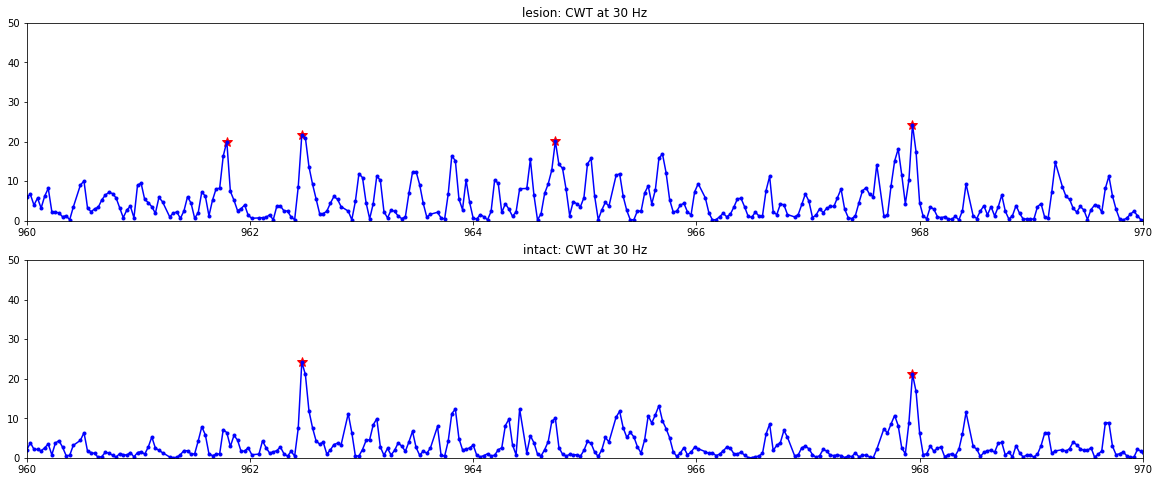

In [90]:

for k in ['myAnimal20190604_122638']:
    fdn = rfdn + k + '/'
    timestamps = np.load(fdn+'tracking/'+'ts_f.npy');l_t = len(timestamps)
    
    idx_clean_f  = np.load(fdn + 'NPY_' +str(fs_out)+'/idx_clean_f.npy')
    idx_clean_th = np.load(fdn + 'Beta_'+str(fs_out)+'/idx_clean_th.npy');
    no_wells  = np.logical_not(np.load(fdn+'tracking/'+'wells_f.npy'));
    idx_clean = np.logical_and(np.logical_and(idx_clean_f, idx_clean_th), no_wells)
    common_spk = np.load(fdn + 'Beta_'+str(fs_out)+'/common_spk_fps.npy')
    
    i = subset[0]; chn = str(i//10)+str(i%10);
    spk_Sxx_ft_l = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    Sxx_ft_l     = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft.npy').T
#     print(spk_Sxx_ft_l.shape, Sxx_ft_l.shape, freqs.shape, (spk_Sxx_ft_l[freqs==30,:]).shape)
    i = subset[1]; chn = str(i//10)+str(i%10);
    spk_Sxx_ft_i = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    Sxx_ft_i     = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft.npy').T
    freqs_beta = freqs[idx_beta]
    fig = plt.figure(1, figsize=(20, 8))
    gs = GridSpec(2 , 1);jj = 0
    print(timestamps.shape)
    
    spk_c = (common_spk[freqs_beta==30,:]>0).squeeze()
    
    spk_l = (spk_Sxx_ft_l[freqs_beta==30,:]>0).squeeze()
#     spk_l[spk_c] = False
    ax_idx = gs[0]; ax = fig.add_subplot(ax_idx);
    ax.plot(timestamps[spk_l], Sxx_ft_l[freqs==30,spk_l].squeeze(), 'r*', ms = 10)
#     ax.plot(timestamps[spk_c], Sxx_ft_l[freqs==30,spk_c].squeeze(), 'g.')
    ax.plot(timestamps[idx_clean], Sxx_ft_l[freqs==30,idx_clean].squeeze(), 'b-')
    ax.plot(timestamps[idx_clean], Sxx_ft_l[freqs==30,idx_clean].squeeze(), 'b.')
    ax.set_xlim([960,970]);ax.set_ylim([0,50]);ax.set_title('lesion: CWT at 30 Hz')
    
    spk_i = (spk_Sxx_ft_i[freqs_beta==30,:]>0).squeeze()
#     spk_i[spk_c] = False
    ax_idx = gs[1]; ax = fig.add_subplot(ax_idx);
    ax.plot(timestamps[spk_i], Sxx_ft_i[freqs==30,spk_i].squeeze(), 'r*', ms = 10)
#     ax.plot(timestamps[spk_c], Sxx_ft_i[freqs==30,spk_c].squeeze(), 'g.')
    ax.plot(timestamps[idx_clean], Sxx_ft_i[freqs==30,idx_clean].squeeze(), 'b-')
    ax.plot(timestamps[idx_clean], Sxx_ft_i[freqs==30,idx_clean].squeeze(), 'b.')
    ax.set_xlim([960,970]);ax.set_ylim([0,50]);ax.set_title('intact: CWT at 30 Hz')

# speed transition method 2: find time windows

Toi1: 2000 Toi1: 3000 Toi2 ***: 2500
0.00307197706366 0.002328827948


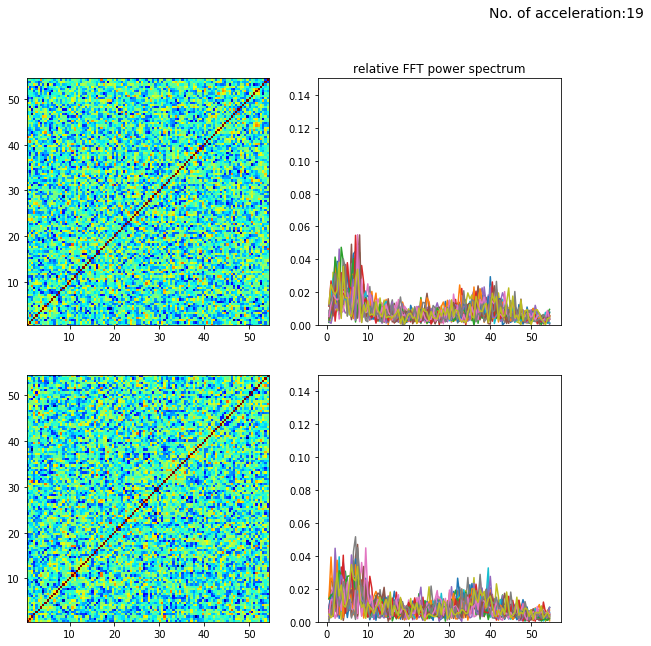

In [6]:
N = int((1/fps)/(1/fs_out)); 
T = 1/fs_out
Toi1 = int(np.load(rfdn + 'Toi1.npy')*(1/fps)/(1/fs_out));
Toi2 = int(np.load(rfdn + 'Toi2.npy')*(1/fps)/(1/fs_out));
Toi2_interest = Toi2-int(0.5*fs_out)
N_acl = 0; N_dcl = 0;
f_1 = np.linspace(1.0/(2.0*T)/int(Toi1/2), 1.0/(2.0*T), int(Toi1/2))
f_2 = np.linspace(1.0/(2.0*T)/int(Toi2/2), 1.0/(2.0*T), int(Toi2/2))
idx_f_1 = f_1<55;
idx_f_2 = f_2<55;
print('Toi1:',Toi1,'Toi1:',Toi2, 'Toi2 ***:',Toi2_interest)
X_f_Toi1_l = np.empty((0, Toi1));
X_f_Toi1_i = np.empty((0, Toi1))

X_f_Toi2_l = np.empty((0, Toi2_interest));
X_f_Toi2_i = np.empty((0, Toi2_interest))

for k in epn:
    fdn = rfdn + k + '/'
    ts_f = np.load(fdn+'tracking/'+'ts_f.npy');l_t = len(ts_f)/fps
    ts    = np.load(fdn+'NPY_'+str(fs_out)+'/ts_ds.npy');l_t = len(ts)
    
    idx_peak_acl = np.load(fdn + 'tracking' + '/t_acc_f.npy');
    idx_peak_dcl = np.load(fdn + 'tracking' + '/t_dec_f.npy');
    ts_f_acl = ts_f[idx_peak_acl]
    ts_f_dcl = ts_f[idx_peak_dcl]
    idx_acl = np.empty((0,))
    idx_dcl = np.empty((0,))
    n_acl = len(idx_peak_acl)
    if n_acl > 0:
        for i in ts_f_acl:
            idx_acl = np.append(idx_acl, np.searchsorted(ts, i));
        idx_acl = idx_acl[idx_acl<l_t-Toi1-Toi2]
        idx_acl = idx_acl.astype('int');
#         print(len(np.round(ts_f_acl,2)), len(np.round(ts[idx_acl],2)))

        i = subset[0]; chn = str(i//10)+str(i%10); x_f_l = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'.npy')
        i = subset[1]; chn = str(i//10)+str(i%10); x_f_i = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'.npy')
        for ii in np.arange(n_acl):
            idx_ref = idx_acl[ii]
            X_f_Toi1_l = np.vstack((X_f_Toi1_l, x_f_l[idx_ref+Toi2:idx_ref+Toi2+Toi1]))
            X_f_Toi1_i = np.vstack((X_f_Toi1_i, x_f_i[idx_ref+Toi2:idx_ref+Toi2+Toi1]))
            X_f_Toi2_l = np.vstack((X_f_Toi2_l, x_f_l[idx_ref:idx_ref+Toi2_interest]))
            X_f_Toi2_i = np.vstack((X_f_Toi2_i, x_f_i[idx_ref:idx_ref+Toi2_interest]))

Y_f_Toi1_l = scipy.fftpack.fft(X_f_Toi1_l); 
Y_f_Toi2_l = scipy.fftpack.fft(X_f_Toi2_l, n = Toi1); 


Y_f_Toi1_l = 2.0/(Toi1) * np.abs(Y_f_Toi1_l[:,:(Toi1)//2])
Y_f_Toi2_l = 2.0/(Toi1) * np.abs(Y_f_Toi2_l[:,:(Toi1)//2])

# Y_f_Toi1_i = scipy.fftpack.fft(X_f_Toi1_i); Y_f_Toi1_i = 2.0/(Toi1) * np.abs(Y_f_Toi1_i[:,:(Toi1)//2])
# Y_f_Toi2_i = scipy.fftpack.fft(X_f_Toi2_i); Y_f_Toi2_i = 2.0/(Toi2) * np.abs(Y_f_Toi2_i[:,:(Toi2)//2])


Y_f_Toi1_l = Y_f_Toi1_l[:,idx_f_1];#Y_f_Toi1_i = Y_f_Toi1_i[:,idx_f_1];
Y_f_Toi2_l = Y_f_Toi2_l[:,idx_f_1];#Y_f_Toi2_i = Y_f_Toi2_i[:,idx_f_1];

Y_f_Toi1_l = (Y_f_Toi1_l.T/np.sum(Y_f_Toi1_l,axis=1)).T;
Y_f_Toi2_l = (Y_f_Toi2_l.T/np.sum(Y_f_Toi2_l,axis=1)).T;

Rou_ff_Toi1_l = np.corrcoef(Y_f_Toi1_l.T); #Rou_ff_Toi1_i = np.corrcoef(Y_f_Toi1_i.T);
Rou_ff_Toi2_l = np.corrcoef(Y_f_Toi2_l.T); #Rou_ff_Toi2_i = np.corrcoef(Y_f_Toi2_i.T);
print(np.mean(Rou_ff_Toi1_l),np.mean(Rou_ff_Toi2_l))

fig = plt.figure(1, figsize=(20,10))
fig.suptitle('No. of acceleration:'+str(Y_f_Toi1_l.shape[0]), fontsize=14)
gs = GridSpec(2, 4);
ax_idx = gs[0,0]; ax = fig.add_subplot(ax_idx);
im = ax.pcolormesh(f_1[idx_f_1], f_1[idx_f_1], Rou_ff_Toi1_l, 
#                    vmin = -0.40, vmax = +0.40,
                   cmap=cm.jet)#
ax_idx = gs[0,1]; ax = fig.add_subplot(ax_idx);ax.set_ylim([0,0.15])
for i in Y_f_Toi1_l:
    ax.plot(f_1[idx_f_1], i);
ax.set_title("relative FFT power spectrum")


ax_idx = gs[1,0]; ax = fig.add_subplot(ax_idx);
im = ax.pcolormesh(f_1[idx_f_1], f_1[idx_f_1], Rou_ff_Toi2_l, 
#                    vmin = -0.40, vmax = +0.40,
                   cmap=cm.jet)#
ax_idx = gs[1,1]; ax = fig.add_subplot(ax_idx);ax.set_ylim([0,0.15])
for i in Y_f_Toi2_l:
    ax.plot(f_1[idx_f_1], i);
    
# ax_idx = gs[1,2]; ax = fig.add_subplot(ax_idx);ax.hist(Rou_ff_Toi2_l)
# ax.plot(f_1[idx_f_1], np.mean(Y_f_Toi2_l,axis=0))

# ax_idx = gs[1,2]; ax = fig.add_subplot(ax_idx);
# im = ax.pcolormesh(f_2[idx_f_2], f_2[idx_f_2], Rou_ff_Toi2_i, 
# #                    vmin = -0.30, 
# #                    vmax = 0.30, 
#                    cmap=cm.jet)#
# ax_idx = gs[1,3]; ax = fig.add_subplot(ax_idx);ax.plot(f_2[idx_f_2], np.mean(Y_f_Toi2_i,axis=0))
# 
# N = 
# window = np.hanning(N*2);
# f = np.linspace(1.0/(2.0*T)/int(N), 1.0/(2.0*T), int(N))
# X_f = X_f * window[None,:];  Y_f = scipy.fftpack.fft(X_f); 
# Y_f = 2.0/(N*2) * np.abs(Y_f[:,:(N*2)//2])

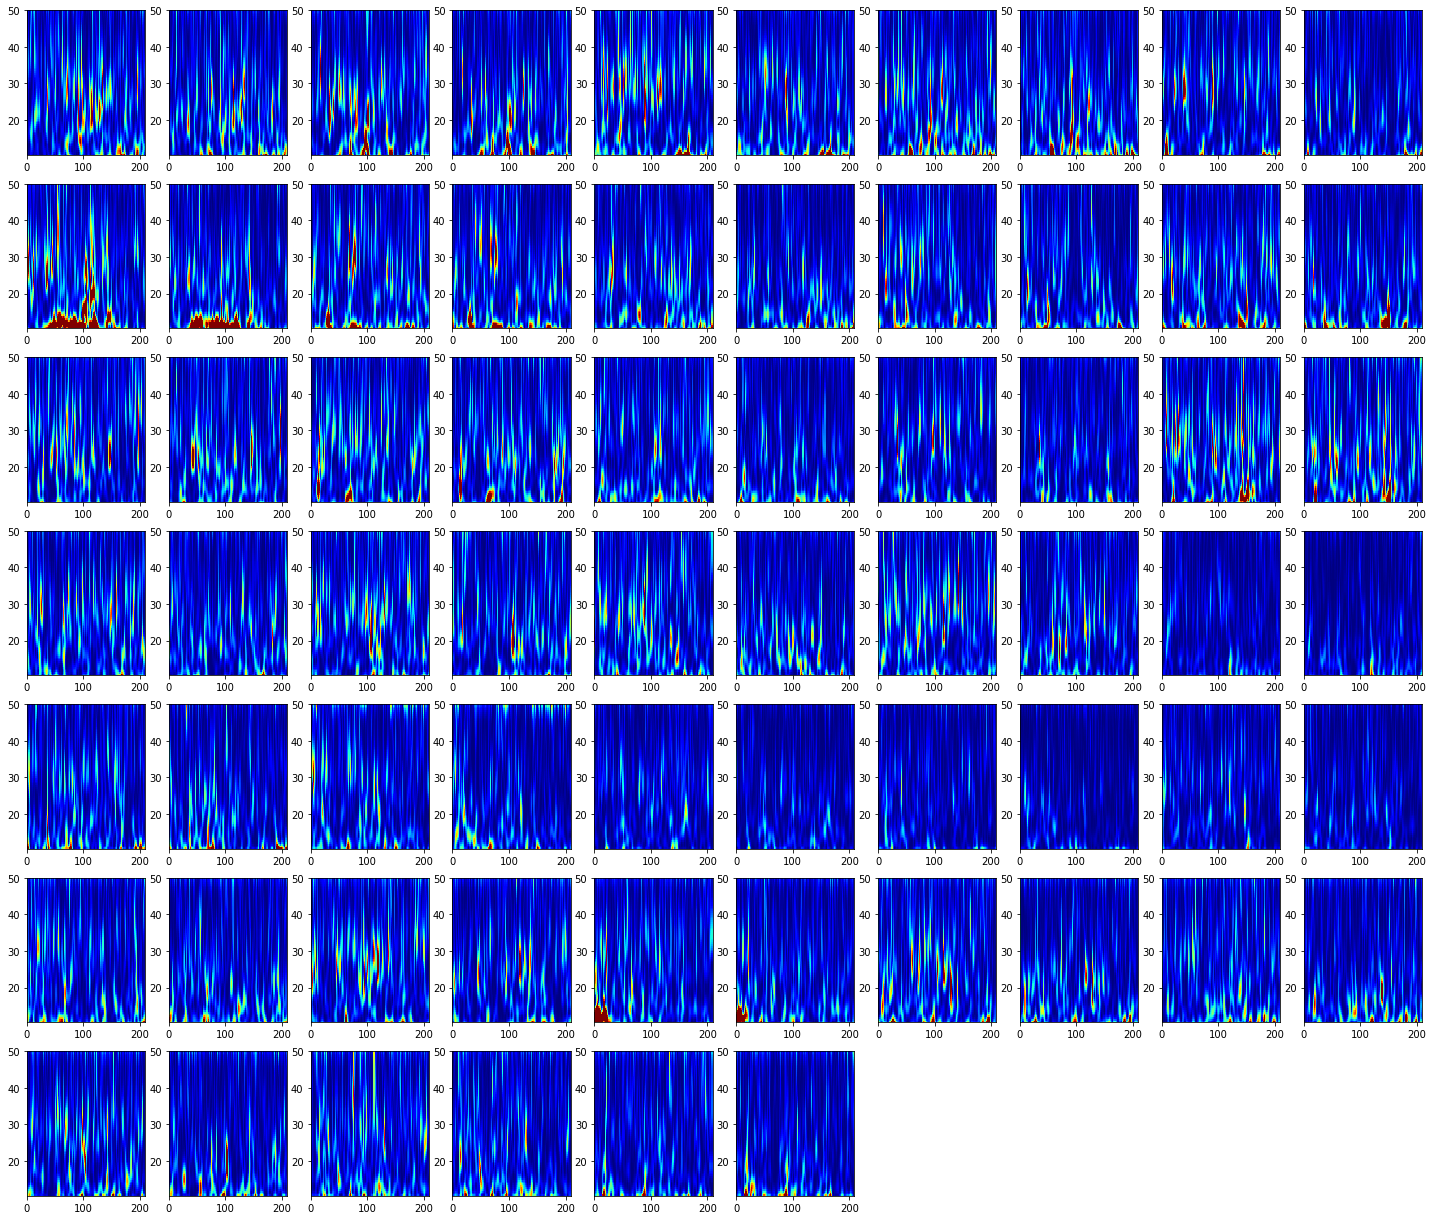

In [103]:
Toi1 = np.load(rfdn + 'Toi1.npy');
Toi2 = np.load(rfdn + 'Toi2.npy');


N_acl = 0; N_dcl = 0;


fig = plt.figure(1, figsize=(25,25))
gs = GridSpec(8,10);jj = 0
for k in epn:

    fdn = rfdn + k + '/'
    common_spk = np.load(fdn + 'Beta_'+str(fs_out)+'/common_spk_fps.npy')
    ts_f = np.load(fdn+'tracking/'+'ts_f.npy')
    
    i = subset[0]; chn = str(i//10)+str(i%10);
    spk_Sxx_ft_l = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    spk_Sxx_ft_l[common_spk] = 0
    Sxx_ft_l = (np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft.npy').T)[idx_beta,:]
    i = subset[1]; chn = str(i//10)+str(i%10);
    spk_Sxx_ft_i = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    spk_Sxx_ft_i[common_spk] = 0
    Sxx_ft_i = (np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft.npy').T)[idx_beta,:]
#     print(Sxx_ft_i.shape, spk_Sxx_ft_i.shape)
    
    l_t = len(ts_f)/fps

    XY = np.load(fdn+'tracking/'+'XY_f.npy')
    pos_ft_Y = XY[:,1];  spd_Y = np.gradient(gaussian_filter(pos_ft_Y, sigma=.5));
    spd_Y = gaussian_filter(spd_Y, sigma=.1)
    pos_ft_X = XY[:,0];  spd_X = np.gradient(gaussian_filter(pos_ft_X, sigma=.5));
    spd_X = gaussian_filter(spd_X, sigma=.1)
    v_ft = np.sqrt (np.square(spd_X)+np.square(spd_Y))
    

    idx_clean_f  = np.load(fdn + 'NPY_'+str(fs_out)+'/idx_clean_f.npy')
    idx_clean_th = np.load(fdn + 'Beta_'+str(fs_out)+'/idx_clean_th.npy');
    idx_clean    = np.logical_and(idx_clean_th, idx_clean_f)

    idx_peak_acl = np.load(fdn + 'tracking' + '/t_acc_f.npy');
    idx_peak_dcl = np.load(fdn + 'tracking' + '/t_dec_f.npy');

    if len(idx_peak_acl)>0:
        for i in np.arange(len(idx_peak_acl)):
            t_ref = idx_peak_acl[i]
            idx_t_spec = np.arange(t_ref,t_ref+Toi1+Toi2).astype('int')
            ax_idx = gs[jj];  ax = fig.add_subplot(ax_idx);jj = jj+1
            im = ax.pcolormesh(idx_t_spec-t_ref, freqs[idx_beta], Sxx_ft_l[:, idx_t_spec],
                               vmin = 0, vmax = 25, cmap=cm.jet)
            ax_idx = gs[jj];  ax = fig.add_subplot(ax_idx);jj = jj+1
            im = ax.pcolormesh(idx_t_spec-t_ref, freqs[idx_beta], Sxx_ft_i[:, idx_t_spec],
                               vmin = 0, vmax = 25, cmap=cm.jet)
            N_acl = N_acl+1


    if len(idx_peak_dcl)>0:

        for i in np.arange(len(idx_peak_dcl)):
            t_ref = idx_peak_dcl[i]
            idx_t_spec = np.arange(t_ref,t_ref+Toi1+Toi2).astype('int')

            N_dcl = N_dcl+1

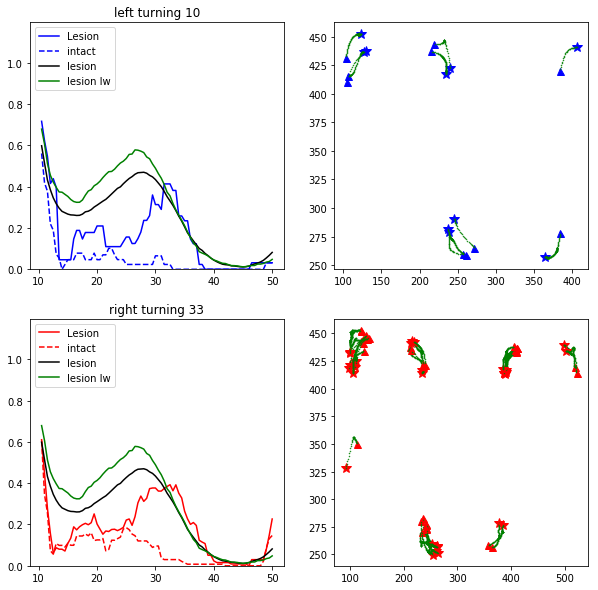

In [107]:
n_spk_l_sum_r1 = np.empty([0,l_f]); n_spk_i_sum_r1 = np.empty([0,l_f])
n_spk_l_sum_r2 = np.empty([0,l_f]); n_spk_i_sum_r2 = np.empty([0,l_f])

n_spk_l_sum_l1 = np.empty([0,l_f]); n_spk_i_sum_l1 = np.empty([0,l_f])
n_spk_l_sum_l2 = np.empty([0,l_f]); n_spk_i_sum_l2 = np.empty([0,l_f])
n_spk_l_sum_l3 = np.empty([0,l_f]); n_spk_i_sum_l3 = np.empty([0,l_f])

n_spk_l_sum_lw = np.empty([0,l_f])
n_spk_l_sum_hg = np.empty([0,l_f])
n_spk_l_sum    = np.empty([0,l_f]); 
n_spk_i_sum    = np.empty([0,l_f])


j = 0;
total = 0
Tn_pre = 1.5
fig = plt.figure(1, figsize=(10,10))
gs = GridSpec(2,2)
ii = 0
for k in epn:
    fdn = rfdn + k + '/'
    ts_f = np.load(fdn+'tracking/'+'ts_f.npy')
    idx_tn = np.load(fdn + 'tracking' +'/idx_tn.npy', );
    d_pre_tn = np.load(fdn+'tracking' +'/d_pre_tn.npy');
    T_tn = np.load(fdn + 'tracking' +'/T_tn_idx.npy');
    tn = np.load(fdn + 'tracking' +'/tn_idx.npy');
    n_tn = len(tn)
    
    if n_tn>0:
        i = subset[0]; chn = str(i//10)+str(i%10);
        spk_Sxx_ft_l = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    #     spk_Sxx_ft_l[common_spk] = 0
        i = subset[1]; chn = str(i//10)+str(i%10);
        spk_Sxx_ft_i = np.load(fdn + 'Beta_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    #     spk_Sxx_ft_i[common_spk] = 0

        l_t = len(ts_f)/fps
        n_spk_l_sum = np.vstack((n_spk_l_sum, np.sum(spk_Sxx_ft_l, axis=1)/l_t))
        n_spk_i_sum = np.vstack((n_spk_i_sum, np.sum(spk_Sxx_ft_i, axis=1)/l_t))

        XY = np.load(fdn+'tracking/'+'XY_f.npy')
        pos_ft_Y = XY[:,1];  spd_Y = np.gradient(gaussian_filter(pos_ft_Y, sigma=.5));
        spd_Y = gaussian_filter(spd_Y, sigma=.1)
        pos_ft_X = XY[:,0];  spd_X = np.gradient(gaussian_filter(pos_ft_X, sigma=.5));
        spd_X = gaussian_filter(spd_X, sigma=.1)
        v_ft = np.sqrt (np.square(spd_X)+np.square(spd_Y))

        n_spk_l_sum_lw = np.vstack((n_spk_l_sum_lw, np.sum(spk_Sxx_ft_l[:,v_ft<=0.01], axis=1)/(len(ts_f[v_ft<=0.01])/fps)))
        n_spk_l_sum_hg = np.vstack((n_spk_l_sum_hg, np.sum(spk_Sxx_ft_l[:,v_ft>=0.4], axis=1)/(len(ts_f[v_ft>=0.4])/fps)))
        
        
        
        for i in np.arange(n_tn):
            TN   = T_tn[i].astype('int')
            tn_i = tn[i].astype('int')

            ax_idx = gs[0];  ax = fig.add_subplot(ax_idx);
            
            if idx_tn[i] ==  1:
                ax_idx = gs[0,1];  ax = fig.add_subplot(ax_idx);
                ax.plot(pos_ft_X[tn_i+TN], pos_ft_Y[tn_i+TN], 'b^', ms=7);
                ax.plot(pos_ft_X[tn_i],    pos_ft_Y[tn_i],    'b*', ms=10);

                idx_t_spec = np.arange(tn_i,tn_i+TN).astype('int')
                n_spk_l_sum_l1 = np.vstack((n_spk_l_sum_l1, 
                                              np.sum(spk_Sxx_ft_l[:,idx_t_spec],axis=1)/(len(idx_t_spec)/fps)))
                n_spk_i_sum_l1 = np.vstack((n_spk_i_sum_l1, 
                                              np.sum(spk_Sxx_ft_i[:,idx_t_spec],axis=1)/(len(idx_t_spec)/fps)))
                
            elif idx_tn[i] == 0:
                ax_idx = gs[1,1];  ax = fig.add_subplot(ax_idx);
                ax.plot(pos_ft_X[tn_i+TN], pos_ft_Y[tn_i+TN], 'r^', ms=7);
                ax.plot(pos_ft_X[tn_i],    pos_ft_Y[tn_i],    'r*', ms=10);
                
                idx_t_spec = np.arange(tn_i,tn_i+TN).astype('int')
                n_spk_l_sum_r1 = np.vstack((n_spk_l_sum_r1, 
                                              np.sum(spk_Sxx_ft_l[:,idx_t_spec],axis=1)/(len(idx_t_spec)/fps)))
                n_spk_i_sum_r1 = np.vstack((n_spk_i_sum_r1, 
                                              np.sum(spk_Sxx_ft_i[:,idx_t_spec],axis=1)/(len(idx_t_spec)/fps)))

            idx_t = np.arange(tn_i,tn_i+TN).astype('int')
            ax.plot(pos_ft_X[idx_t], pos_ft_Y[idx_t], 'g.', ms=1);
ax_idx = gs[0,0];  
ax = fig.add_subplot(ax_idx);
ax.set_title('left turning'+' '+str(n_spk_l_sum_l1.shape[0]));
ax.plot(freqs[idx_beta], np.mean(n_spk_l_sum_l1, axis=0), 'b', label = 'Lesion')
ax.plot(freqs[idx_beta], np.mean(n_spk_i_sum_l1, axis=0), 'b--', label = 'intact')
ax.plot(freqs[idx_beta], np.mean(n_spk_l_sum, axis=0), 'k',   label = 'lesion')
ax.plot(freqs[idx_beta], np.mean(n_spk_l_sum_lw, axis=0), 'g',   label = 'lesion lw')
ax.set_ylim([0,np.max(np.mean(n_spk_l_sum, axis=0))*2]);ax.legend(loc = 'upper left')
# ax.set_xlim([10,25])
ax_idx = gs[1,0];  
ax = fig.add_subplot(ax_idx);
ax.set_title('right turning'+' '+str(n_spk_l_sum_r1.shape[0]));
ax.plot(freqs[idx_beta], np.mean(n_spk_l_sum_r1, axis=0), 'r', label = 'Lesion')
ax.plot(freqs[idx_beta], np.mean(n_spk_i_sum_r1, axis=0), 'r--', label = 'intact')
ax.plot(freqs[idx_beta], np.mean(n_spk_l_sum, axis=0), 'k',   label = 'lesion')
ax.plot(freqs[idx_beta], np.mean(n_spk_l_sum_lw, axis=0), 'g',   label = 'lesion lw')
ax.set_ylim([0,np.max(np.mean(n_spk_l_sum, axis=0))*2]);ax.legend(loc = 'upper left')
# ax.set_xlim([10,25])
plt.savefig(rfdn+'pic2/speed_method2_'+str(Toi1)+'.png')